In [1]:
# Matplotlib это пакет для построения графиков, чаще всего двумерных, полиграфического качества.

# Воспользуемся интерактивным режимом для постреония графиков, выполним для этого такую команду:

%matplotlib notebook

# Краткое введение в API библиотеки  Matplotlib

In [1]:
# При работе с matplotlib мы будем использовать следующее соглашение об импорте:

%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# Построим свой первый простой график:

import numpy as np

data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


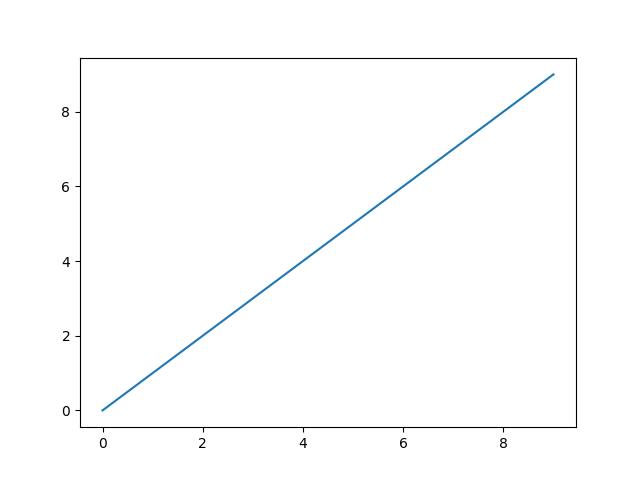

In [5]:
plt.plot(data)

In [6]:
# Бибилиотеки типа Seaborn и встроенные в Pandas функции построения графиков берут на себя многие рутинные
# детали, но если предусмотренных в них параметров нам недостаточно, то придется разбираться с API библиотеки Matplotlib


# Рисунки и подграфики

<IPython.core.display.Javascript object>


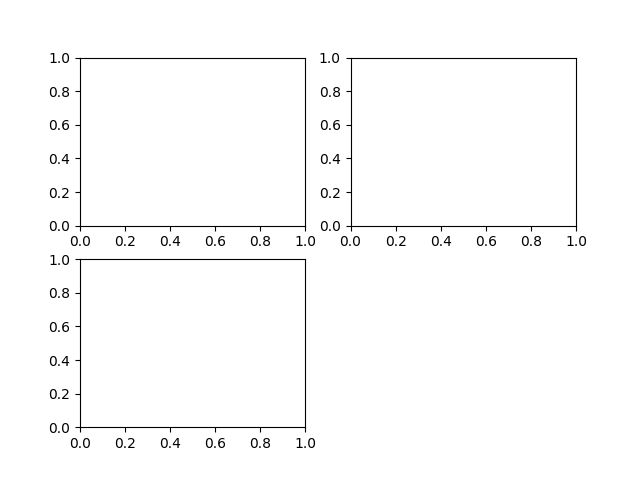

In [10]:
# Графики в matplotlib 'живут' внутри объекта рисунка Figure. Создать новый рисунок можно методом plt.figure:

fig = plt.figure()

# после кода снизу мы видим пустой рисунок с тремя подграфиками

In [28]:
# У команды plt.figure() имеется ряд параметров, в частности, figsize гарантирует, что при сохранении рисунка на 
# диске у него будут опредленные размер и соотношения сторон.

# Нельзя создать график, имея пустой рисунок. Сначала нужно создать один или несколько подграфиков с помощью
# метода add_subplot():

In [11]:
ax1 = fig.add_subplot(2, 2, 1)

In [12]:
# Код внутри означает, что рисунок будет расчерчен сеткой 2 на 2, и мы выберем первый из четырех подграфиков
# (нумерация начинается с 1). А давай создадим еще на рисунке несколько подграфиков:

ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


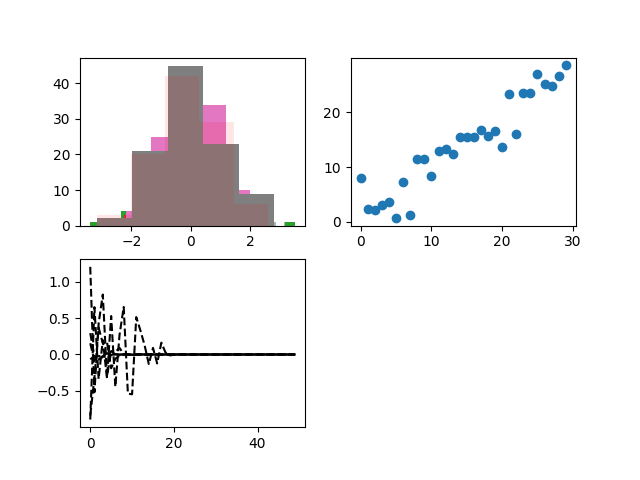

In [26]:
# Один из нюансов работы с блокнотами заключается в том, что графики сбрасываются после вычислений каждой ячейки
# поэтому, если графики достаточно сложны, то следует помещать все команды построения в одну
# ячейку блокнота.

# То есть, код сверху нужно было записывать не по отдельным ячейкам, а сразу в одной:

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [33]:
# При выполнении команды построения графика, например, plt.plot([1.5, 3.5, -2, 1.6]), matplotlib рисует 
# НА ПОСЛЕДНЕМ ИСПОЛЬЗОВАННОМ рисунке и подграфике, при необходимости создав и то и другое, и тем самым маскируя
# создание рисунка и подграфика. Следовательно, выполнив показанную ниже команду, мы получим картину:

plt.plot(np.random.randn(50).cumprod(), '--k') # рисунок выше

In [44]:
# Параметр стиля '--k' говорит, что график нужно рисовать черновой штриховой линией. Метод fig.add_subplot 
# возвращает объект AxesSubplot, который позволяет рисовать в другом пустом подграфике, вызывая
# его методы экземпляра:

ax1.hist(np.random.randn(100), bins=5, color='red', alpha=0.1)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


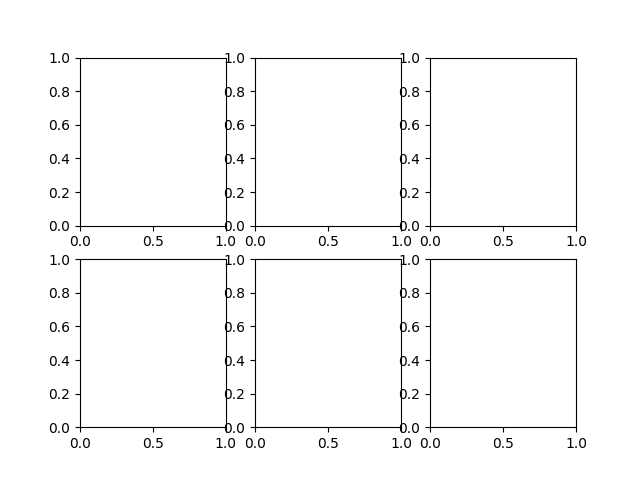

In [45]:
# Поскольку создание рисунка с несколькими подграфиками, расположенными оперделенными образами - это типичная задача,
# то существует вспомогательный метод plt.subplots, который создает новый рисунок и возвращает массив NumPy
# содержащий созданные  в нем объекты подграфиков:

fig, axes = plt.subplots(2, 3) # задаем размерность 2 строки и 3 столбца, все будет построено подграфиками

In [46]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<IPython.core.display.Javascript object>


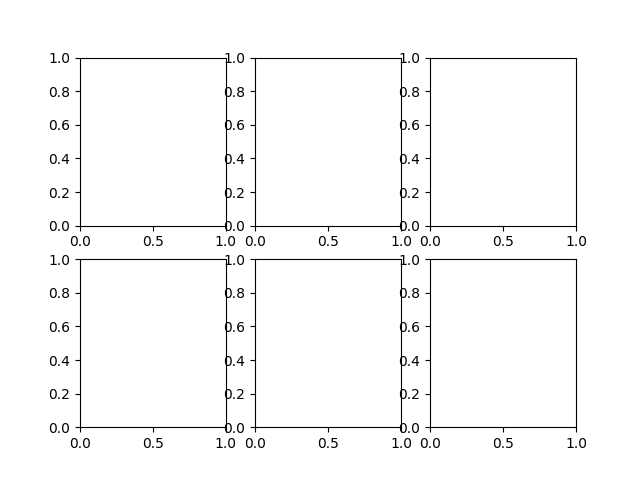

In [47]:
fig

In [48]:
# Это очень полезно, потому что к массиву axes вполне можно обращаться как к двумерному массиву, например axe[0,1]:

axes[0,1]

<AxesSubplot:>

In [50]:
# Можно также указать, что подграфики должны иметь общую ось x или y, задав параметры sharex и sharey 
# соответственно. Особенно это удобно, когда надо сравнить данные в одном масштабе, иначе matplotlib
# самостоятельно и  автоматически выберет масштаб графика

In [51]:
# Параметры методы pyplot.subplots:
# 
# nrows - число строк в сетке подграфиков
#
# ncols - число столбцов в сетке подграфиков
#
# sharex - все подграфики должны иметь одинаковые риски на оси X (настройка xlim отражается на всех подграфиках)
#
# sharey - все подграфики должны иметь одинаковые риски на оси Y (настройка ylim отражается на всех подграфиках)
#
# subplot_kw - словарь ключевых слов для создания подграфиков

<IPython.core.display.Javascript object>


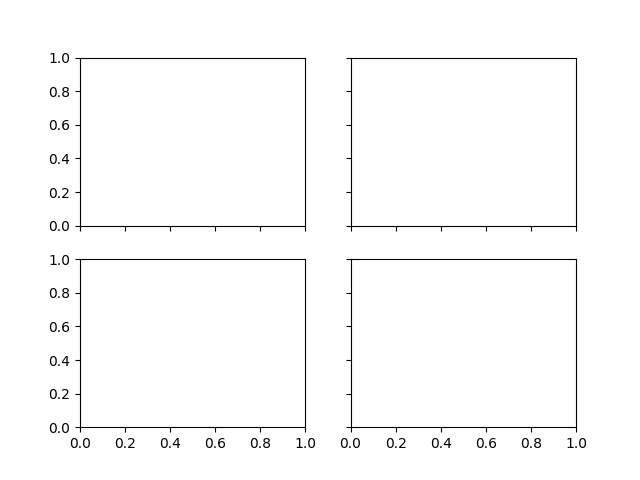

In [60]:
figi = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True) # то есть эти параметры просто выставляют одну ось!)

# Задание свободного места вокруг подграфиков

In [61]:
# По умолчанию matplotlib оставляет пустое место вокруг каждого подграфика и между подграфиками. Размер этого места
# опеределяется шириной и высотой графика, так что, если изменить размер этого места программно или вручную (изменив размер окна),
# то график автоматически перестроится. Величину промежутка легко изменить с помощью метода subplots_adjust 
# объекта Figure, который также доступен в виде функции верхнего уровня:

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

NameError: name 'subplots_adjust' is not defined

<IPython.core.display.Javascript object>


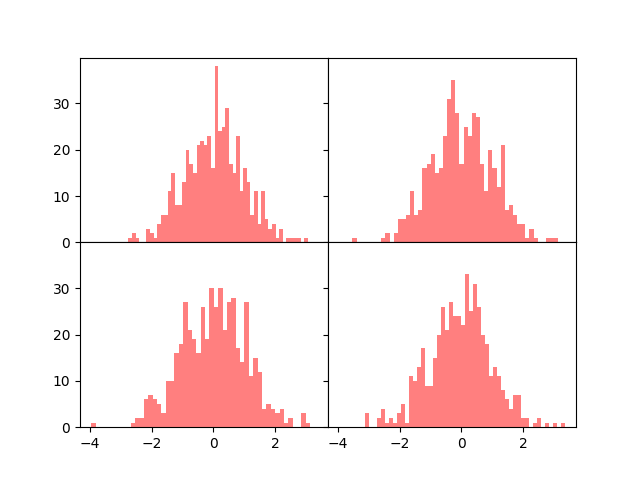

In [66]:
# Параметры wspace и hspace опеределяют, какой процент от ширины и высоты рисунка должен составлять промежуток между
# подграфиками. Давай поэксперементируем и зададим нулевой промежуток:

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='r', alpha=0.5)
    plt.subplots_adjust(wspace=0, hspace=0)

# Цвета, маркеры и стили линий

<IPython.core.display.Javascript object>


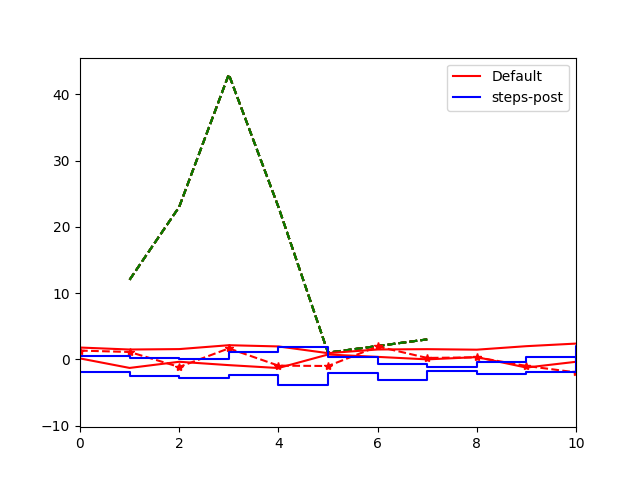

In [21]:
# Главная функция matplotlib - ploit принимает массивы координат x и у, а также необязательную строку, в которой 
# закодированы цвет и стиль линии. Например, чтобы нарисовать график зависимости x от у зеленой штриховой линией,
# нужно выполнить следующий вызов:

fig = plt.figure()
x = [1, 2, 3, 4, 5, 6, 7]
y = [12, 23, 43, 23, 1, 2, 3]

plt.plot(x, y, 'g--') # g делает зеленым, а -- делает пунктирным

In [30]:
# Такой способ задания цвета и стиля линий в виде строки не более чем удобство. На практике, когда графики 
# строятся из программы, лучше не использовать строковое обозначение стиля. Лучше писать так:

plt.plot(x, y, linestyle='--', color='g')

In [27]:
?plt.plot # лучше смотреть справку по стилю и цвету

In [31]:
# Линейные графики могут быть также снабжены маркерами, обозначающими точки, по которым построен график. Поскольку
# matplotlib создает непрерывный линейный график, производя интерполяцию между точками, иногда неясно, где
# же находятся исходные точки. Маркер можно задать в строке стиля:
# сначала цвет, потом тип маркера и в конце стиль линии. Или же задать явно:

plt.plot(np.random.randn(30), color='red', linestyle='dashed', marker='*')


In [33]:
# По умолчанию на линейных графиках соседние точки соединяются отрезками прямой, то есть производится
# линейная интерполяция. Параметр drawstyle позволяет изменить этот режим:

ax = plt.plot(np.random.randn(30).cumsum(), color='red', label='Default')



In [36]:
ax = plt.plot(np.random.randn(30).cumsum(), color='blue', drawstyle='steps-post', label='steps-post')


In [39]:
plt.legend() # указывает на графике легенду меток, какие они задействованы

# Риски, метки и надписи

In [40]:
# Для оформления графиков существуют два основных способа: процедурный интерфейс pyplot и собственный
# объектно-ориентированный matplotlib API.
#
# Интерфейс pyplot, предназначенный для интерактивного использования, состоит из методов xlim, xticks и 
# xticklabels. Они управляют размером области, занятой графиком, положением и метками рисок соответственно. Использовать
# их можно двумя способами:
# = при вызове без аргументов возвращается текущее значение параметра. Например, метод plt.xlim() возвращает текущий 
# диапазон значений по оси Х.
# = при вызове с аргументами устанавливается новое значение параметра. Например, в результате вызова plt.xlim([0, 10])
# диапазон значений по оси X устанавливается от 0 до 10
#
#

In [42]:
plt.ylim()

(-10.255578258602934, 45.53597991707633)

In [43]:
plt.xlim([0, 10])

(0.0, 10.0)

In [44]:
# Все подобные методы действуют на активный или последний созданный объект AxesSubplots. Каждому из них
# соответствуют два метода самого объекта подграфика; в случае xlim это методы ax.get_xlim и ax.set_xlim/

# Задание названия графика, название осей, рисок и их меток

<IPython.core.display.Javascript object>


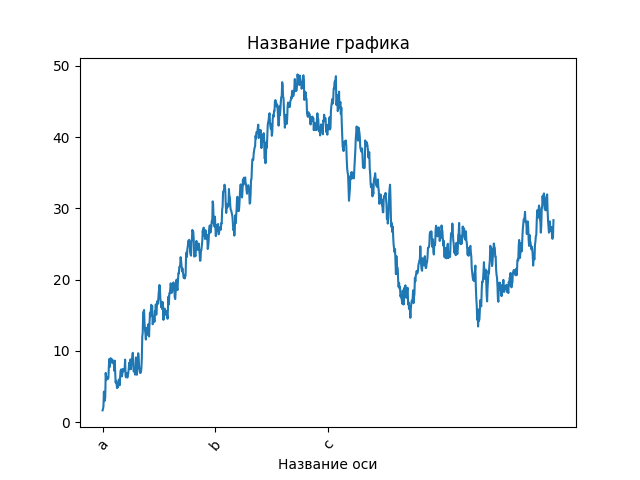

In [48]:
# Чтобы проиллюстрировать оформление осей, создадим простой рисунок и в нем график случайного блуждания:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [54]:
# Для изменения рисок оси X проще всего воспользоваться методами set_xticks и set_xticklabels. Первый
# говорит matplotlib, где в пределах диапазона значений ставить риски. По умолчанию их числовые значения значения
# изображаются также и в виде меток. Но можно задать и другие метки с помощью метода set_xticklabels:

ticks = ax.set_xticks([0, 250, 500]) # просто показывает метки п оси X
labels = ax.set_xticklabels(list('abc'), rotation=50) # теперь указывает другие метки оси

In [55]:
# rotation устанавливает угол наклона меток рисок к оси раным 30 градусов. Наконец, метод set_xlabel именует ось
# Х, а метод set_title задает название подграфика:

ax.set_title('Название графика')

Text(0.5, 1.0, 'Название графика')

In [56]:
ax.set_xlabel('Название оси')

Text(0.5, 21.72455125392974, 'Название оси')

<IPython.core.display.Javascript object>


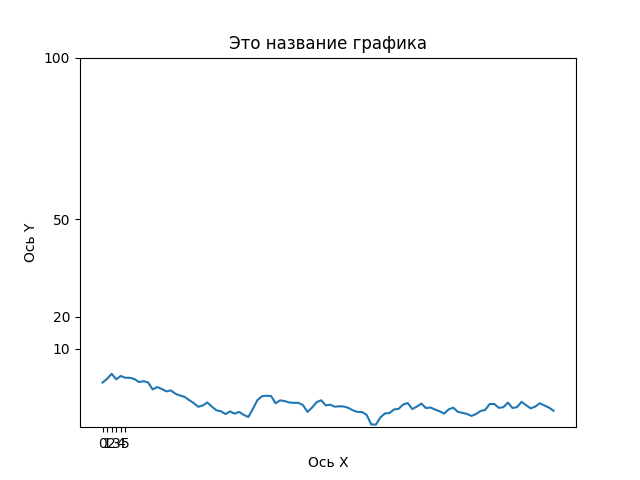

[Text(0.5, 0, 'Ось X'),
 Text(0, 0.5, 'Ось Y'),
 Text(0.5, 1.0, 'Это название графика'),

In [61]:
# Модификация оси y производится аналогично, просто меняем первую букву. В классе оси имеется метод set, позволяющий
# задавать сразу несколько свойств графика. Так, например:

figure_2 = plt.figure()
ax2 = figure_2.add_subplot(1, 1, 1)
ax2.plot(np.random.randn(100).cumsum())

# а теперь задам сразу много параметров через словарь, это офигенно:

props = {
    
    'xlabel' : 'Ось X',
    'ylabel' :'Ось Y',
    'title' : 'Это название графика',
    'xticks' : [0, 1, 2, 3, 4, 5],
    'yticks' : [10, 20, 50, 100]
}

ax2.set(**props)

In [65]:
print(*props)

xlabel ylabel title xticks yticks


# Добавление пояснительных надписей

<IPython.core.display.Javascript object>


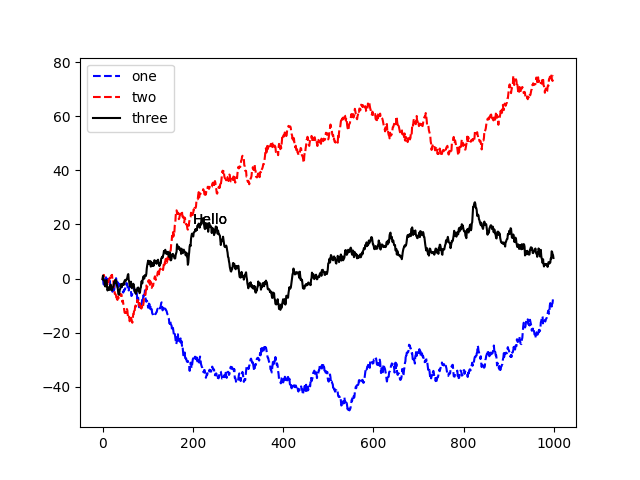

In [6]:
# Пояснительная надпись - еще один важный элемент офрмления графика. Добавить ее можно двумя способами. Проще
# всего передать аргумент label при добавлении каждого нового графика.

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), color='blue', label='one', linestyle='--')
ax.plot(np.random.randn(1000).cumsum(), color='red', label='two', linestyle='dashed')
ax.plot(np.random.randn(1000).cumsum(), color='k', label='three')



In [11]:
# После этого можно вызвать метод ax.legend() или plt.legend(), и он автоматически создаст пояснительную надпись.
# То есть label дает имя графику, а legend уже отображает имя

plt.legend()

# Аннотация и рисование в подграфике

In [16]:
# Помимо стандартнх типов графиков, разрешается наносить на график свои аннотации, которые могут содержать текст
# стрелки и другие  фигуры. Для добавления аннотации и текста предназначены функции text, arrow, annotate. Функция
# text наносит на график текст, начиная с точки с заданными координатами (x, y), с факультативной стилизацией.

ax.text(200, 20, 'Hello', family='momospace', fontsize=10)

Text(200, 20, 'Hello')

<IPython.core.display.Javascript object>


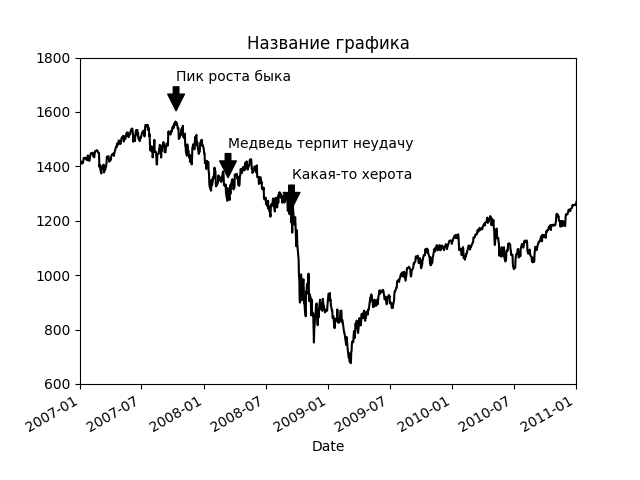

Text(0.5, 1.0, 'Название графика')

In [35]:
# В аннотациях могут встречаться текст и стрелки. Построим график курса акций и аннотируем его важными датами.
# Лучше всего код к графику писать в одной ячейке:

from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Пик роста быка'),
    (datetime(2008, 3, 12), 'Медведь терпит неудачу'),
    (datetime(2008, 9, 15), 'Какая-то херота')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+50), xytext=(date, spx.asof(date)+200),
    arrowprops=dict(facecolor='black'), horizontalalignment='left', verticalalignment='top'          
               
               )
    

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Название графика')


In [36]:
# Для рисования фигур требуется боольше усилий. В MATPLOTLIB имеются объекты, соответствующие многим стандратным
# фигурам, они называются патчами (patches). Часть из них, например Rectangle, Circle, находятся в модуле
# matplotlib.pyplot, а весь набор в моделе matplotlib.patches.

<IPython.core.display.Javascript object>


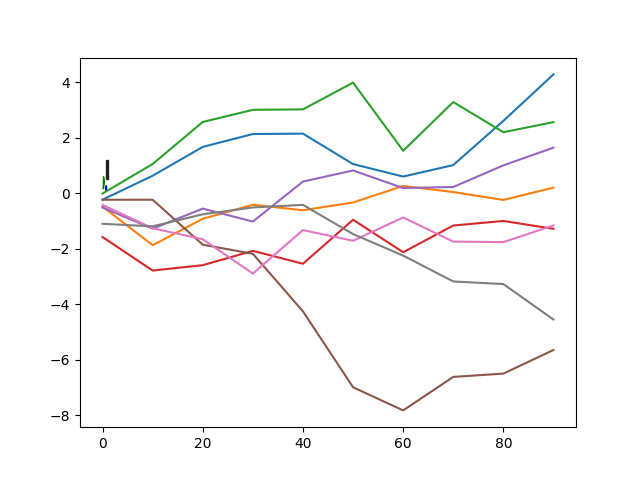

In [50]:
# Чтобы поместить на график фигуру, мы создаем объект патча shp и добавляем его в подграфик, вызывая метод
# ax.add_patch(shp):

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.7, 0.5), 0.4, 0.7, color='k', alpha=0.8) # alpha меняет цветовую контрастность
circ = plt.Circle((0.7, 0.2), 0.1, color='blue', linestyle='--', alpha=1) #0.1 ЭТО РАДИУС!
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='green')

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# Сохранение графиков в файле

In [52]:
# Активный рисунок можно сохранить в файле методом plt.savefig. Этот метод эквивалентен методу экземпляра
# рисунка savefig. Например, чтобы сохранить рисунок в формате SVG, достаточно указать только имя файла:

plt.savefig('new.svg')

# Или в pdf:

plt.savefig('new2.pdf')

In [58]:
# При публикации графики часто используют два параметра: dpi(разрешение в точках на дюйм) и bbox_inches (размер)
# пустого места вокруг графика:

plt.savefig('new4.pdf', dpi=500, bbox_inches='tight')

In [57]:
plt.savefig('new5.pdf', dpi=20, bbox_inches='tight')

In [62]:
# Метод savefig может писать не тоько на диск, но и в любой другой, похожий на файл объект, например StringIO

In [63]:
# Аргументы метода Figure.savefig:

# fname - имя сохраняемого файла, расширение указывается в названии
#
# dpi - разрешение рисунка в точках на дюйм, по умолчанию 100, но можно менять
#
# facecolor, edgecolor - цвет фона рисунка, вне области, занятой подграфиками. По умолчанию 'w' - белый
#
# format - явно заданный формат файла
#
# bbox_inches - какую часть рисунка сохранять. Если задать 'tight', обрежется все пустое место вокруг рисунка

In [64]:
plt.savefig('new6.pdf', dpi=20, bbox_inches='tight', facecolor='red')

# Построение графиков с помощью Pandas и Seaborn

In [65]:
# Библиотека matplotlib - средсво довольно низкого уровня. Гграфик собирается из базовых компонентов: способ отображения
# данных - тип графика, пояснительная надпись, название, метки и риски и прочие аннотации. 
#
# А ведь в Pandas может быть несколько столбцов данных, а с ними метки строк и метки столбцов. В саму Pandas
# встроены методы построения, упрощающие визуализацию. 
#
# Существует и другая библиоетка Seaborn, она упрощает создание многих типов визуализации. Но все они построены на 
# matplotlib, поэтому в результате импорта seaborn меняются схемы цветов и стили графиков matplotlib, которые были
# заданы по умолчанию.

# Линейные графики

In [77]:
# У объектов Series и DataFrame имеется метод plot, который умеет строить графики разных типов. По умолчанию
# он строит линейные графики:

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

In [78]:
# Индекс объекта Series передается matplotlib для нанесения рисок на ось X, но это можно отключить, если задать
# параметр use_index=False. Риски и диапазон значений на оси x можно настраивать с помощью параметров
# xticks и xlim. Большинство методов построения графиков в Pandas принимает необяательный параметр ax - это объект
# подграфика matplotlib. Это позволяет гибко расположить подграфики в сетке.

In [54]:
# Параметры метода Series.plot
#
# label - метка для пояснительной надписи на графике
#
# ax - объект подграфика matplotlib, внутри которого строится график. Если параметр не задан, то используется
# активный подграфик
#
# style - строка стиля, например 'ko--', которая передается matplotlib
#
# alpha - уровень непрозрачности графика от 0 до 1
#
# kind - может принимать значения 'line', 'bar', 'barh', 'kde'
#
# logy - использовать логарарифмический масштаб по оси y
#
# use_index - брать метки рисок из индексов объектов
#
# rot - угол поворота меток рисок (0 до 360)
#
# xticks - значение рисок на оси x
#
# xlim - границы по оси х
#
# grid - отображать координатную сетку, по умолчанию выключено

In [15]:
# Пооэксперементируем с этими параметрами:

data = np.random.randn(100).cumsum()
index= np.arange(0, 1000, 10)

In [53]:
s = pd.Series(data, index=index)
s.plot(label='rEr', style='--', alpha=0.6, kind='line', rot=100, xticks=[0, 500, 100], grid=True, legend=True)

<AxesSubplot:>

In [47]:
# Метод plot объекта DataFrame строит отдлеьные графики каждого столбца внутри одного подграфика и автоматически
# создает пояснительнительную надпись:

df = pd.DataFrame(np.random.randn(10, 4).cumsum(axis=1), columns=list('ABCD'), index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-1.548997,-0.845092,-1.843200,-2.034695
10,-0.683308,-1.083150,-1.492382,-2.336971
20,-0.750108,-0.503108,-0.817866,-0.685819
30,-0.349416,-0.144416,0.416886,-0.832356
40,0.105818,-0.619277,-0.554953,-0.634896
50,0.590207,0.089020,1.518366,2.504057
60,-1.383079,-3.031153,-1.731065,-3.063169
70,0.009171,-1.419333,-2.828238,-3.455347
80,-0.755222,-0.374896,-0.503048,0.558419
90,0.142186,0.669848,0.946578,-0.251127


<IPython.core.display.Javascript object>


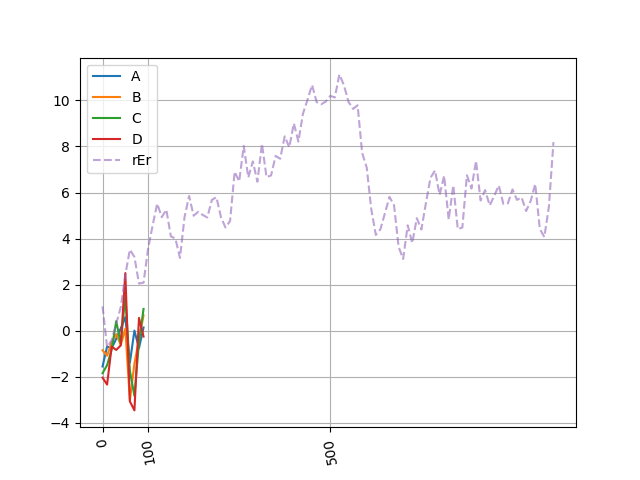

<AxesSubplot:>

In [52]:
df.plot(legend=True)

In [49]:
# Атрибут plot содержит семейство методов для различных типов графиков. Например, df.plot() эквивалентно 
# df.plot.line()

In [50]:
# Параметры метода DataFrame.plot:
#
# subplots - рисовать график каждого столбца в отдельном подграфике
#
# sharex - если, subplots=True, то ось x использовать совместно, объединяя риски и границы
#
# figsize - размеры создаваемого рисунка в виде кортежа
#
# title - название графика в виде строки
#
# legend - помещать в подграфик пояснительную надпись, по умолчанию True
#
# sort_columns - строить графики столбцов в алфавитном порядке, по  умолчанию используется существующий порядок столбцов

# Столбчатые диаграммы

<IPython.core.display.Javascript object>


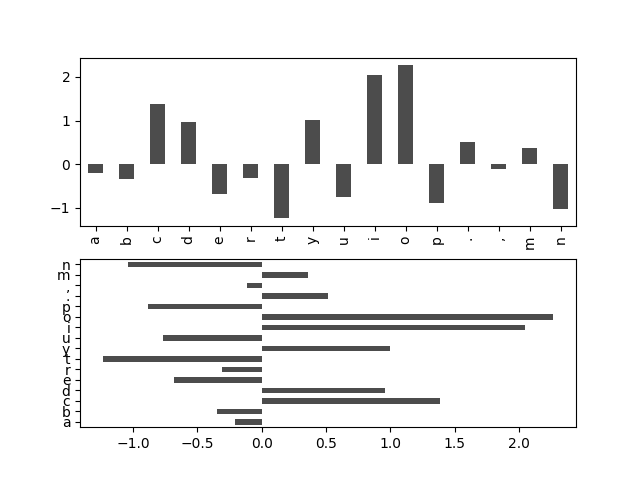

<AxesSubplot:>

In [63]:
# Методы plot.bar() и plot.barh() строят строят соответственно вертикальную и горизонтальную столбчатые диаграммы.
# В этом случае индекс Series или DataFrame будет использоваться для нанесения рисок на ось Х (bar) и 
# ось Y (barh)

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16), index=list('abcdertyuiop.,mn'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [58]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [66]:
# В случае DataFrame значения каждой строки объединяются в группы столбиков:

df = pd.DataFrame(np.random.rand(6,4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(list('ABCD')))


In [68]:
df.index.name = 'genus'

In [69]:
df

,A,B,C,D
genus,,,,
one,0.017930,0.000444,0.393760,0.077471
two,0.239684,0.596986,0.635941,0.640928
three,0.050639,0.666047,0.429616,0.398066
four,0.834677,0.940393,0.087216,0.505836
five,0.807371,0.347446,0.886090,0.865978
six,0.276036,0.225804,0.695014,0.545887


<IPython.core.display.Javascript object>


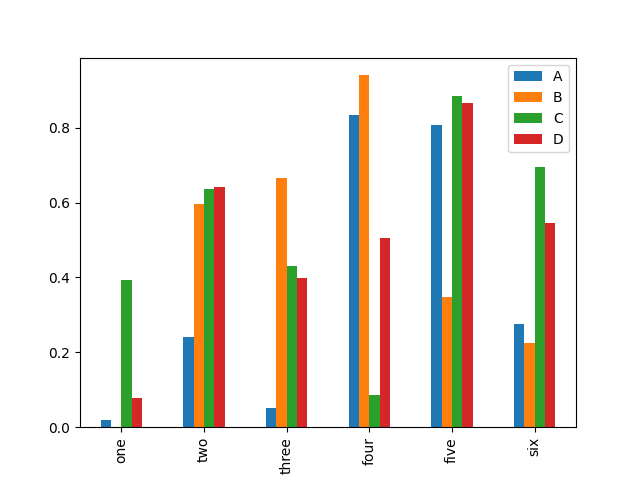

<AxesSubplot:xlabel='genus'>

In [70]:
df.plot.bar()

<IPython.core.display.Javascript object>


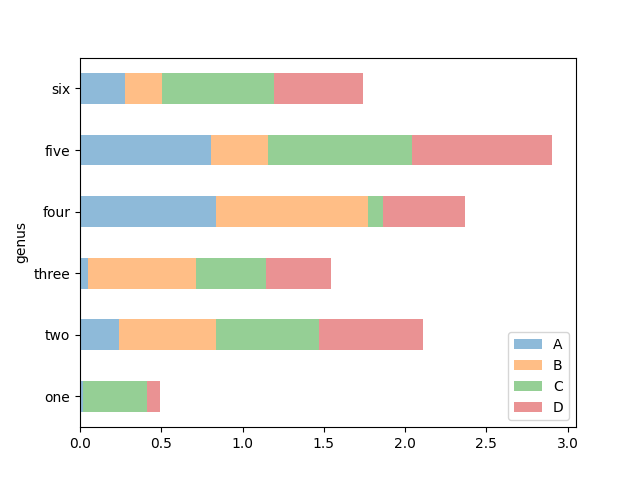

<AxesSubplot:ylabel='genus'>

In [75]:
# Обратите внимание, что название столбцов DataFrame - genus используется в заголовке пояснительной надписи.
# Для построения составной столбчатой диаграммы по объекту DataFrame нужно задать параметр stacked=True,
# тогда столбики, соответствующие значению в каждой строке, будут приставлены друг к другу.

df.plot(kind='barh', stacked=True, alpha=0.5)

In [76]:
# Столбчатые диаграммы полезны для визуализации частоты значений в объекте Series с применением метода
# value_counts: s.value_counts().plot.bar()

In [3]:
# Допустим, мы хотим построить составную столбчатую диаграмму, показывающую процентную долю данных, относящихся
# к каждому значению количества гостей в ресторане каждый день:

tips = pd.read_csv('tips.csv')
tips.rename(columns={'size' : 'siz'}, inplace=True)
tips


,total_bill,tip,smoker,day,time,siz
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [12]:
tips.siz

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: siz, Length: 244, dtype: int64

In [4]:
party_counts = pd.crosstab(tips.day, tips.siz) # crosstab вычисляет таблицу частот факторов
party_counts

siz,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [5]:
# Группы, насчитывающие 1 и 6 гостей редки, избавимся от них:

party_counts

siz,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [39]:
party_counts[[2, 3, 4, 5]] # через двойные скобки выбрал нужне столбцы

siz,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [6]:
party_counts = party_counts[[2, 3, 4, 5]]

In [7]:
# Затем нормируем значения, так чтобы сумма в каждой строке была равна 1 

party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

siz,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


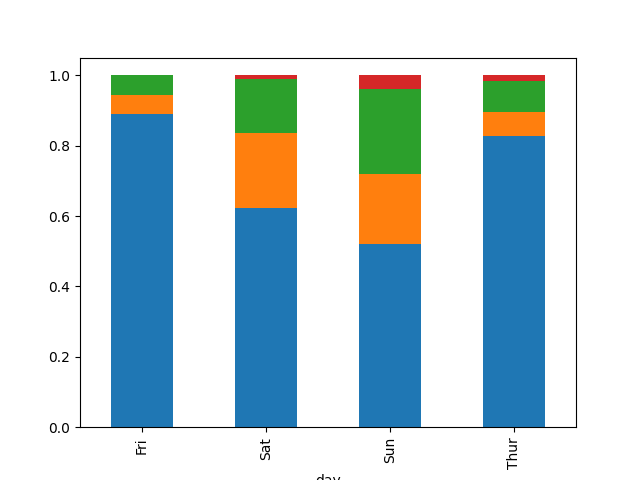

<AxesSubplot:xlabel='day'>

In [59]:
party_pcts.plot.bar(stacked=True, legend=False)

In [8]:
# Как видим, в выходные количество гостей в одной группе увеличивается. Если перед построением графика данные нужно как-то
# агрегировать, то пакет seaborn может существенно в этом помочь. Посмотрим как посчитать прцоент чаевых 
# в зависимости от дня:

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips

,total_bill,tip,smoker,day,time,siz,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


<IPython.core.display.Javascript object>


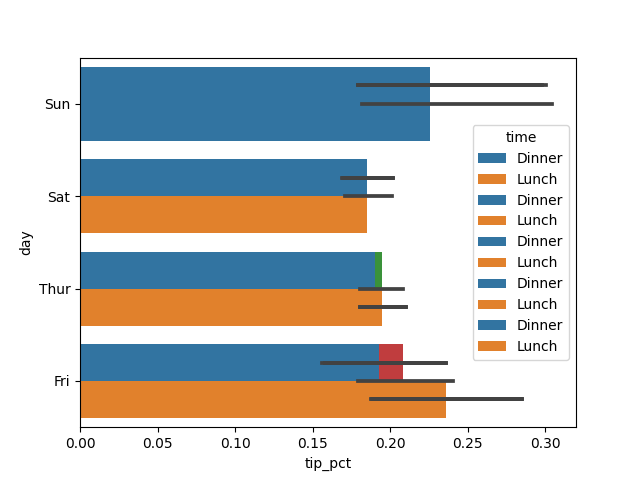

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [65]:
# Построим график через seaborn

sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [66]:
# Функция построения графиков из библиоетки Seaborn принимают аргумент data, в роли которого может выступать объект 
# DataFrame. Остальные аргументы относятся к именам столбцов. Поскольку для каждого значения в day имеется 
# несколько наблюдений, столбики отражают среднее значение tip_pct (процента чаевых). Черные линии, проведенные
# поверх столбиков представляют собой 95%-доверительне интервалы. Этот параметр можно настраивать

In [71]:
# Функция Seaborn.barplot принимает аргумент hue, позволяющий произвести разбиение по дополнительному дискретному
# значению:

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h') # график ебанутый, потому что компилил несколько раз!!!!!!!!!!!!!!!!!!!!!!!!

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [72]:
# Менять внешний вид графиков позволяет функция seaborn.set()

sns.set(style='whitegrid')

# Гистограммы и графики плотности

In [75]:
# Гистограмма, с которой мы все хорошо знакомы, - это разновидность столбчатой диаграммы, показывающая
# дискретизированное представление частоты. Результаты измерений распределяются по дискретным интервалам 
# равной ширины, а на гистограмме отображается количество точек в каждом интервале. На примере приведенных выше данных
# о чаевых от гостей ресторана мы с помощью метода hist объекта Series можем построить гистограмму распределения
# чаевых от общей суммы счета:



<AxesSubplot:xlabel='tip_pct', ylabel='Frequency'>

<IPython.core.display.Javascript object>


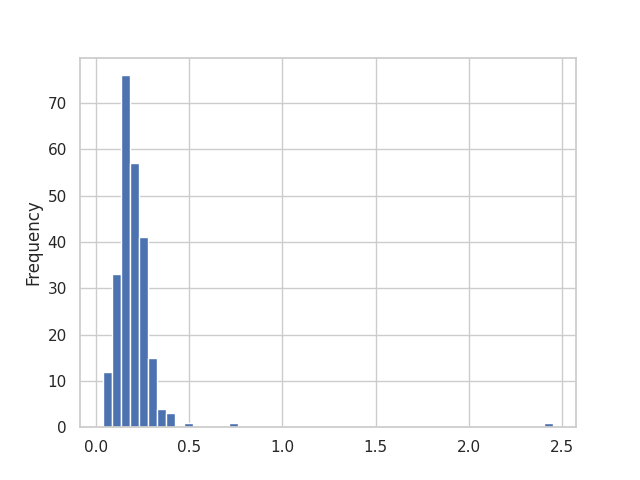

<AxesSubplot:ylabel='Frequency'>

In [77]:
fig2 = plt.figure()
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


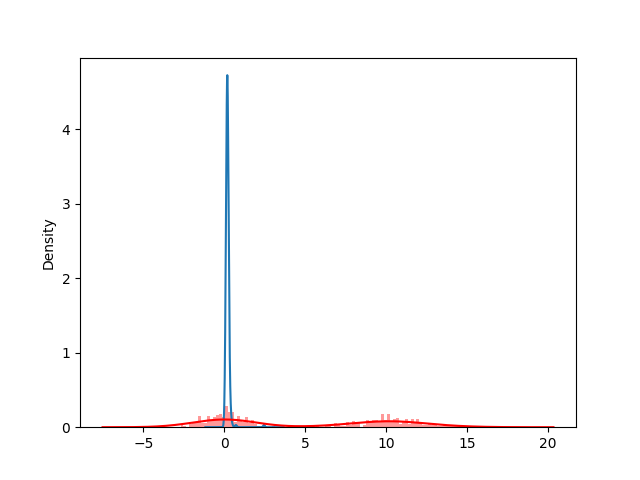

<AxesSubplot:ylabel='Density'>

In [11]:
# С гистограммой тесно связан график плотности, который строится на основе оценки непрерывного распределения вероятности
# по результатам измерений. Обычно стараются апроксимировать это распределение комбинацией ядер, то есть
# более простых распределений, например нормального. Поэтому графики плотности еще называют KDE (kernel density estimate)
# Функция plot с параметром kind='kde' строит график плотности, применяя стандартный метод комбинирования 
# нормальных распределений. 


tips['tip_pct'].plot(kind='kde')

<IPython.core.display.Javascript object>


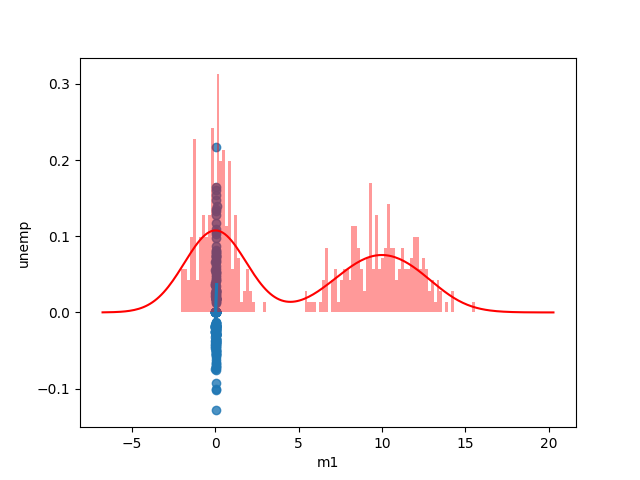

/home/alex/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [18]:
# Seaborn еще упрощает построение гистограмм и графиков плотности благодаря методу distplot, который может строить
# одновременно гистограмму и непрерывную оценку плотности. В качестве прмера рассмотрим бимодальное распределение,
# содержащее выборки из двух разных стандартных нормальных распределений:

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

fig = plt.figure()
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='r')

# вот и построили нормированную гистограмму и оценки плотности смеси нормальных распределений

# Диаграмма рассеяния

<IPython.core.display.Javascript object>


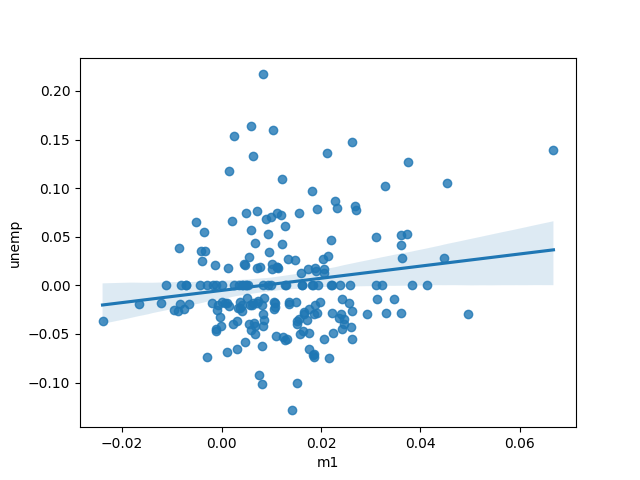

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


In [25]:
# Диаграмма рассеяния, или точечная диаграмма, - полезный способ исследования соотношения между двумя одномерными
# рядами данных. Загрузим некоторый набор данных, выберем некоторые переменные и вычислим логарифмические разности:

macro = pd.read_csv('macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

fig = plt.figure()
trans_data = np.log(data).diff().dropna()
trans_data

In [26]:
# Затем мы можем использовать метод regplot из библиотеки Seaborn, чтобы построить диаграмму рассеяния и
# аппроксимирующую ее прямую линейной регрессии:

sns.regplot('m1', 'unemp', data=trans_data)

/home/alex/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='m1', ylabel='unemp'>

<IPython.core.display.Javascript object>


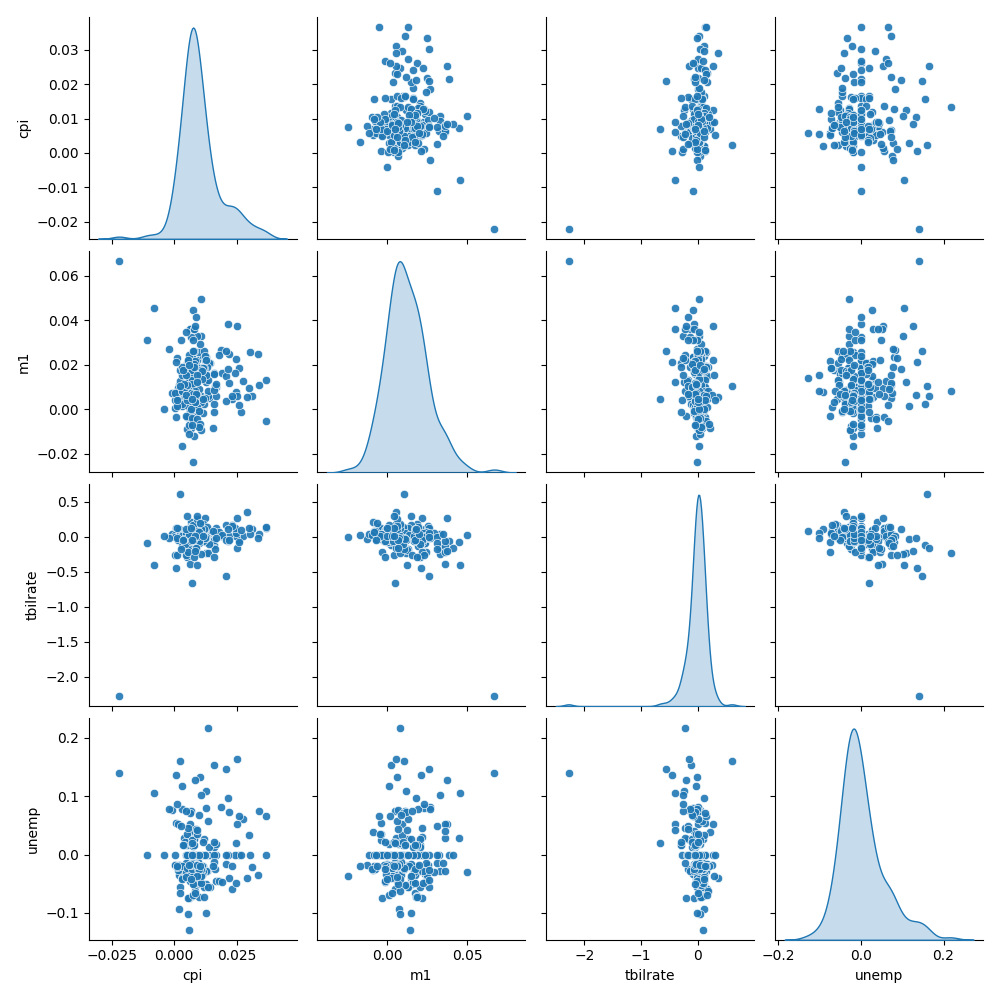

In [30]:
# В разведочном анализе данных полезно видеть все диаграммы рассеяния для группу перменных. Это называется 
# диаграммой пар или матрицей диаграмм рассеяния. В Seaborn для этого имеется функция pairplot, которая
# поддерживает размещение гистограмм или графиков оценки плотности каждой переменной вдоль диагонали:


sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha' : 0.9})

In [31]:
# Стоит обратить внимание на аргумент plot_kws. Он позволяет передавать конфигурационные параметры отдельным
# вызовом построения во внедиагональных элементах!

# Фасетные сетки и категориальные данные

/home/alex/.local/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


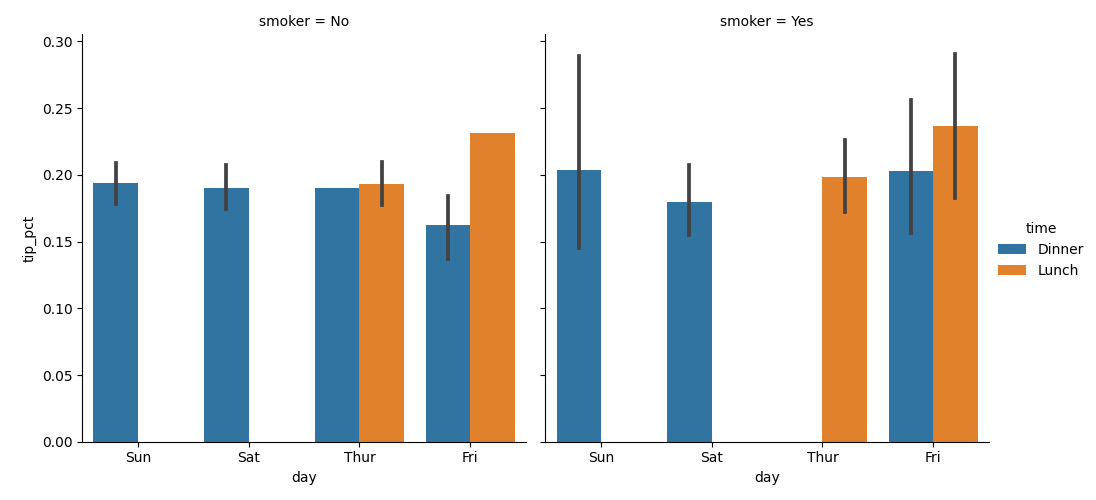

In [33]:
# Как быть с наборами данных, в которых имеются дополнительные группировочные измерения? Один из способов
# визуализировать данные с большим числом категориальных переменных - воспользоваться фасетной сеткой.
# В seaborn - имеется полезная функция factorplot, которая упрощает построение разнообразных
# фасетных графиков:

sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])


/home/alex/.local/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


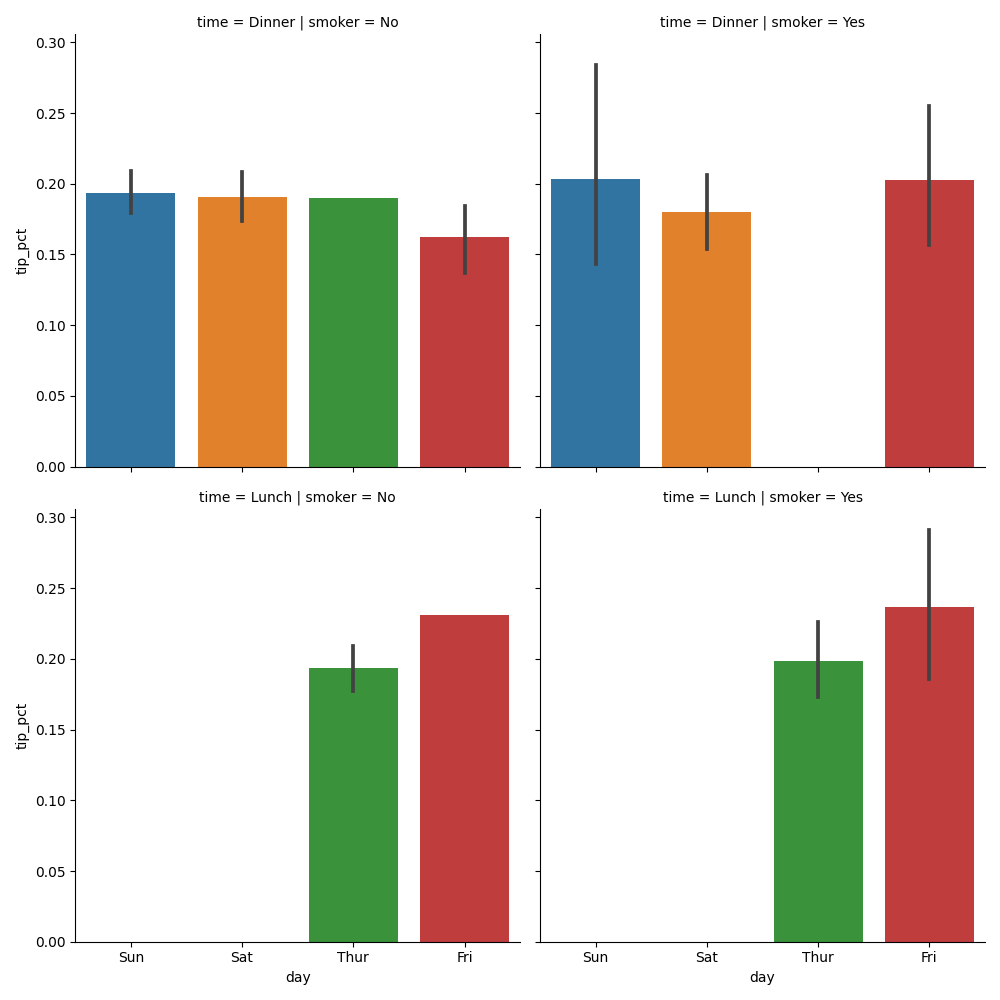

In [35]:
# Вместо того, чтобы использовать для группировкии по 'time' столбики разных цветов внутри фасеты. мы можем расширить
# фасетную сетку, добавив по одной строке на каждое новое значение  time:

sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

/home/alex/.local/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


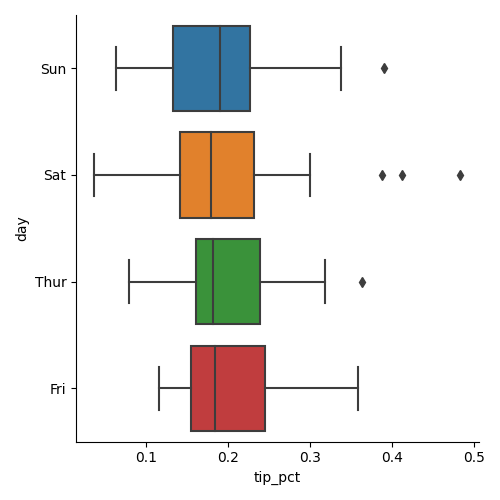

In [36]:
# Функция factorplot поддреживает и другие тип графиков, которые могут оказаться поелзными в зависимости от того,
# что мы пытаемся показать. Например, диаграмма размаха, на которой отображаются медиана, квартили и выбросы:

sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])